In [1]:
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data from each band (assuming files are named accordingly)
with open('new_data/pd vs hc/delta.pkl', 'rb') as f:
    delta_data = pickle.load(f)
with open('new_data/pd vs hc/theta.pkl', 'rb') as f:
    theta_data = pickle.load(f)
with open('new_data/pd vs hc/alpha.pkl', 'rb') as f:
    alpha_data = pickle.load(f)
with open('new_data/pd vs hc/beta.pkl', 'rb') as f:
    beta_data = pickle.load(f)
with open('new_data/pd vs hc/gamma.pkl', 'rb') as f:
    gamma_data = pickle.load(f)

In [3]:
# Stack the bands along the third dimension
data = np.stack([delta_data["data"], theta_data["data"], alpha_data["data"], beta_data["data"], gamma_data["data"]], axis=-1)  # shape: (31, 180, 32, 5)

In [4]:
# Reshape the data
data = data.reshape(data.shape[0], data.shape[1], -1)  # Shape: (31, 180, 160)

In [5]:
data.shape

(28, 120, 145)

In [6]:
y=gamma_data['label']

In [7]:
from sklearn.preprocessing import StandardScaler

# Reshape from (31, 180, 160) to (31*180, 160) for normalization
X_reshaped = data.reshape(-1, data.shape[-1])  # Shape: (5580, 160)

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)  # Standardize across the feature dimension

# Reshape back to original shape (31, 180, 160)
X_normalized = X_scaled.reshape(data.shape)

print("Original shape:", data.shape)
print("Standardized shape:", X_normalized.shape)


Original shape: (28, 120, 145)
Standardized shape: (28, 120, 145)


In [8]:
X_normalized=np.array(X_normalized)
y=np.array(y)

In [9]:
# Assuming data.shape = (31, 180, 160) and y.shape = (31,)
# Reshape data for CNN input
X = X_normalized[..., np.newaxis]  # Add channel dimension, new shape: (31, 180, 160, 1)

CNN start

In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
X_train.shape

(22, 120, 145, 1)

In [12]:
# Build the CNN model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(120, 145, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use sigmoid if labels are not one-hot encoded
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/20
6/6 [==============================] - 3s 58ms/step - loss: 4.7890 - accuracy: 0.5909 - val_loss: 0.8024 - val_accuracy: 0.3333
Epoch 2/20
6/6 [==============================] - 0s 11ms/step - loss: 1.9027 - accuracy: 0.5455 - val_loss: 0.8058 - val_accuracy: 0.3333
Epoch 3/20
6/6 [==============================] - 0s 11ms/step - loss: 1.4389 - accuracy: 0.6364 - val_loss: 0.7061 - val_accuracy: 0.6667
Epoch 4/20
6/6 [==============================] - 0s 11ms/step - loss: 0.7659 - accuracy: 0.5909 - val_loss: 0.7441 - val_accuracy: 0.5000
Epoch 5/20
6/6 [==============================] - 0s 11ms/step - loss: 0.5474 - accuracy: 0.5909 - val_loss: 0.7396 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 0s 11ms/step - loss: 0.5359 - accuracy: 0.6818 - val_loss: 0.7492 - val_accuracy: 0.5000
Epoch 7/20
6/6 [==============================] - 0s 11ms/step - loss: 0.5128 - accuracy: 0.8182 - val_loss: 0.7357 - val_accuracy: 0.5000
Epoch 8/20
6/6 [===========

K-Fold starts

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import KFold


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

Training fold 1...
Epoch 1/10
4/4 [==============================] - 1s 98ms/step - loss: 4.1104 - accuracy: 0.4286 - val_loss: 0.9371 - val_accuracy: 0.6429
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 2.3701 - accuracy: 0.5714 - val_loss: 0.7126 - val_accuracy: 0.6429
Epoch 3/10
4/4 [==============================] - 0s 21ms/step - loss: 1.6468 - accuracy: 0.7143 - val_loss: 0.7173 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 23ms/step - loss: 0.6797 - accuracy: 0.7143 - val_loss: 0.6588 - val_accuracy: 0.5714
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 0.2713 - accuracy: 0.9286 - val_loss: 0.6422 - val_accuracy: 0.6429
Epoch 6/10
4/4 [==============================] - 0s 21ms/step - loss: 0.4190 - accuracy: 0.7857 - val_loss: 0.6416 - val_accuracy: 0.6429
Epoch 7/10
4/4 [==============================] - 0s 21ms/step - loss: 0.3062 - accuracy: 0.7857 - val_loss: 0.6638 - val_accuracy: 0.5714
Epoch 8/

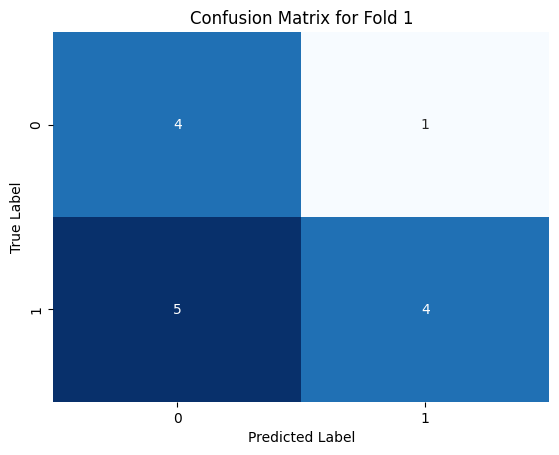

Fold 1 - Accuracy: 0.5714285714285714, Precision: 0.8, Recall: 0.4444444444444444, F1 Score: 0.5714285714285714, AUC: 0.6444444444444445
Training fold 2...
Epoch 1/10
4/4 [==============================] - 1s 57ms/step - loss: 1.8727 - accuracy: 0.4286 - val_loss: 0.7388 - val_accuracy: 0.6429
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 2.0066 - accuracy: 0.8571 - val_loss: 3.1722 - val_accuracy: 0.3571
Epoch 3/10
4/4 [==============================] - 0s 21ms/step - loss: 1.8760 - accuracy: 0.8571 - val_loss: 1.1806 - val_accuracy: 0.5714
Epoch 4/10
4/4 [==============================] - 0s 22ms/step - loss: 0.5040 - accuracy: 0.8571 - val_loss: 0.7154 - val_accuracy: 0.6429
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 0.6260 - accuracy: 0.7857 - val_loss: 0.8718 - val_accuracy: 0.6429
Epoch 6/10
4/4 [==============================] - 0s 21ms/step - loss: 0.0775 - accuracy: 1.0000 - val_loss: 1.1410 - val_accuracy: 0.5714
Epoch 7/10

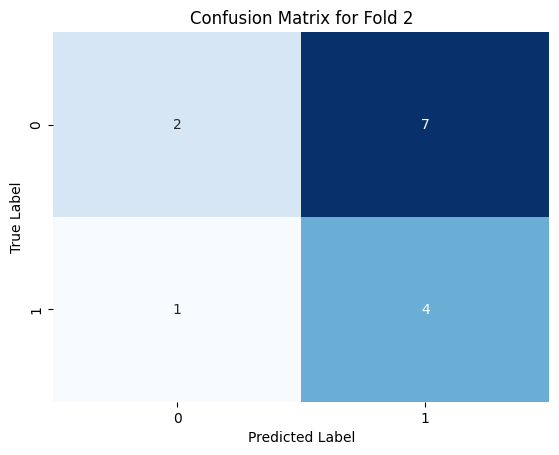

Fold 2 - Accuracy: 0.42857142857142855, Precision: 0.36363636363636365, Recall: 0.8, F1 Score: 0.5, AUC: 0.7333333333333334


In [16]:
# Set up cross-validation
kf = KFold(n_splits=2, shuffle=True, random_state=42)
fold_accuracies, fold_precisions, fold_recalls, fold_f1s, fold_aucs = [], [], [], [], []
history_list = []


for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Training fold {fold + 1}...")

    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define CNN model
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(120, 145, 1)),
        MaxPooling2D(pool_size=(2, 1)),
        Dropout(0.3),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 1)),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model and save history for training curve
    history = model.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test), verbose=1)
    history_list.append(history)

    # Predictions and evaluation
    y_pred_prob = model.predict(X_test).ravel()  # Flatten to 1D array
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    fold_aucs.append(roc_auc)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Store metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    fold_accuracies.append(acc)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1s.append(f1)

    print(f"Fold {fold + 1} - Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {roc_auc}")


In [17]:
# Average metrics across folds
print("\nCross-Validation Results:")
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Average Precision: {np.mean(fold_precisions):.4f}")
print(f"Average Recall: {np.mean(fold_recalls):.4f}")
print(f"Average F1 Score: {np.mean(fold_f1s):.4f}")
print(f"Average AUC Score: {np.mean(fold_aucs):.4f}")


Cross-Validation Results:
Average Accuracy: 0.5000
Average Precision: 0.5818
Average Recall: 0.6222
Average F1 Score: 0.5357
Average AUC Score: 0.6889


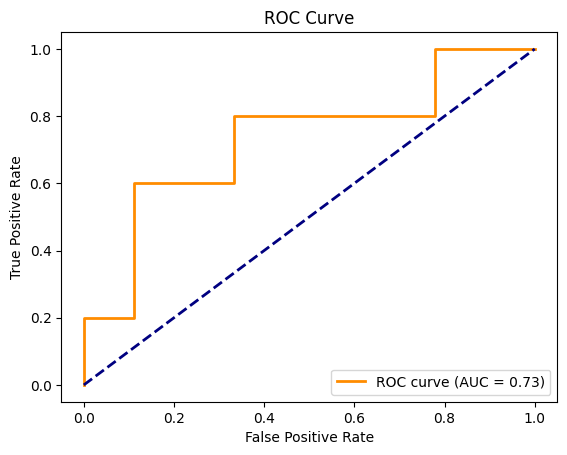

In [18]:
# Plot ROC Curve for the last fold
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

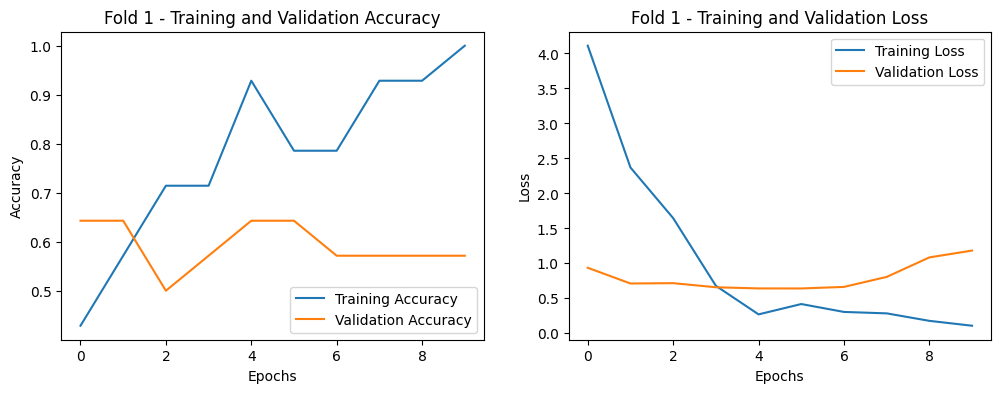

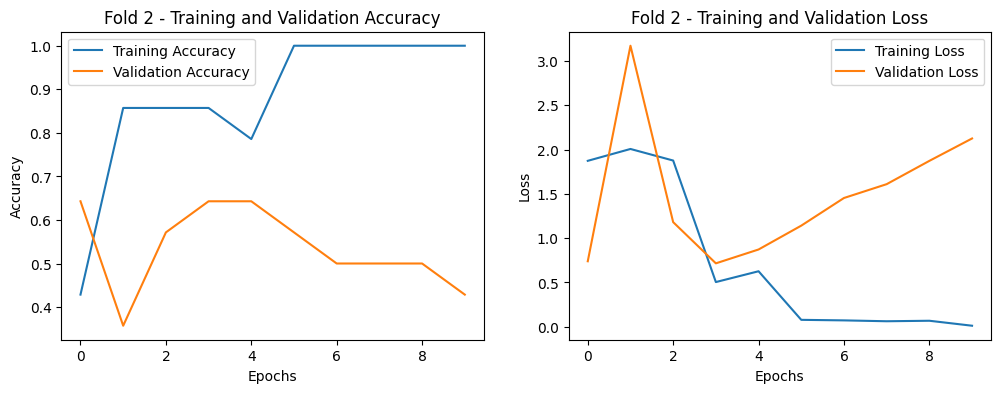

In [19]:
# Plot Training and Validation Accuracy & Loss for each fold
for i, history in enumerate(history_list):
    plt.figure(figsize=(12, 4))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i + 1} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i + 1} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()